In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

def a(ax, theme, label, data, title, hide_ylabel=False, _type=1, ylabel_type='s', hint=None, xticks=['8GB','16GB','32GB','64GB']):
    X = np.arange(4)
    width = 0.12
    bars, meta = None, []
    for idx, item in enumerate(data):
        # row, m = [], []
        # for val in item:
        #     if val > 0:
        #         row.append(val)
        #         m.append(None)
        #     else:
        #         row.append(0)
        #         if val == 0:
        #             m.append('OOM')     # out
        #         elif val == -1:
        #             m.append('TO')      # time out
                
        bar = ax.bar(X + (width * idx), item, width=width, color=theme[idx][0], hatch=theme[idx][1], edgecolor='black', label=label[idx])
        bars = bars + bar if bars is not None else bar
    
    for rect in bars:
        if rect.get_height() > 0:
            continue
        
        if _type == 1:
            x = rect.get_x() + (rect.get_width() / 2.0) - 0.02
            y = rect.get_y() + 1.4
            if rect.get_height() == 0:
                ax.text(x, y, "out-of-memory error", {'size': 6, 'color': 'red'}, rotation=90, weight='bold')
            else:
                ax.text(x, y, "timeout", {'size': 6, 'color': 'red'}, rotation=90, weight='bold')
        else:
            x = rect.get_x() + (rect.get_width() / 2.0) - 0.03
            y = rect.get_y() + 1.4
            if rect.get_height() == 0:
                if hint == 'pr':
                    y += 0.3
                ax.text(x, y, "out-of-memory error", {'size': 10, 'color': 'red'}, rotation=90, weight='bold')
            else:
                if hint == 'pr':
                    y += 0.3
                ax.text(x, y, "timeout", {'size': 10, 'color': 'red'}, rotation=90, weight='bold')

    ax.set_xticks(X + 0.32, xticks)
    if hide_ylabel is False:
        if ylabel_type == 's':
            ax.set_ylabel('Elapsed Time (s)', fontsize=14)
        elif ylabel_type == 'ms':
            ax.set_ylabel('Elapsed Time (ms)', fontsize=14)
    # if hint == 'pr':
    #     ax.set_xlabel('Dataset Type', fontsize=14)
    # else:
    ax.set_xlabel('Dataset Label', fontsize=14)
    # ax.set_title(title, fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1)

    return bars


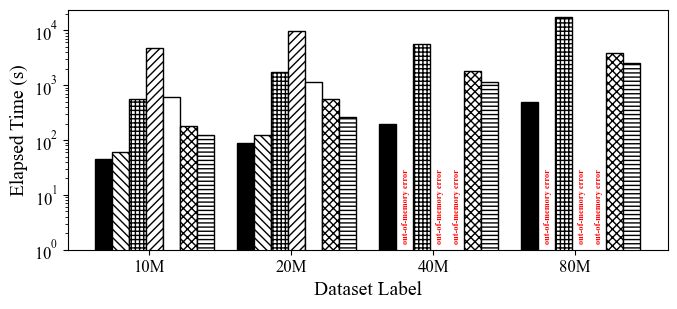

<Figure size 600x60 with 0 Axes>

In [2]:
theme = [
    ['black', ''],
    ['white', '\\\\\\\\'],
    ['white', '++++'],
    ['white', '////'],
    ['white', ''],
    ['white', 'xxxx'],
    ['white', '----'],
]
label = ['PreVision', 'SystemDS', 'MLlib', 'MADlib', 'SciDB', 'NumPy', 'Dask']

# LR
lr_data = [
    [22, 39, 84, 267],          # TilePACK
    [29, 55, 3001, 8241],       # SystemDS
    [383, 1616, 4772, 14436],   # MLlib
    [1198, 1870, 0, 0],         # MADlib
    [246, 477, 0, 0],           # SciDB
    [19, 38, 247, 780],         # NumPy
    [32, 386, 965, 2107]        # Dask
]

nmf_data = [
    [46, 87, 198, 503],
    [61, 124, 0, 0],
    [551, 1741, 5697, 17640],
    [4851, 9656, 0, 0],
    [615, 1166, 0, 0],
    [179, 553, 1843, 3828],
    [126, 262, 1166, 2581],
]


fig = plt.figure(figsize=(6, 2.4))

ax1 = fig.add_axes([0, 0, 1, 1])
# ax2 = fig.add_axes([1.2, 0, 1, 1])

# main plot
# a(ax1, theme, label, lr_data, "Dense LR", xticks=["10M", "20M", "40M", "80M"])
res = a(ax1, theme, label, nmf_data, "Dense NMF", xticks=["10M", "20M", "40M", "80M"])
# res = ax1.legend(bbox_to_anchor=(0.6, 1.1, 1, 0.102), loc=4, ncol=5, mode="expand", fontsize=11)
plt.savefig('eval_dense_overall_b.pdf', format='pdf', bbox_inches='tight')

# legend
lfig = plt.figure(figsize=(6, 0.6))
plt.figlegend(*ax1.get_legend_handles_labels(), loc = 'upper center', ncol=4, mode="expand", fontsize=11)
lfig.savefig('eval_dense_overall_legend.pdf', format='pdf', bbox_inches='tight')

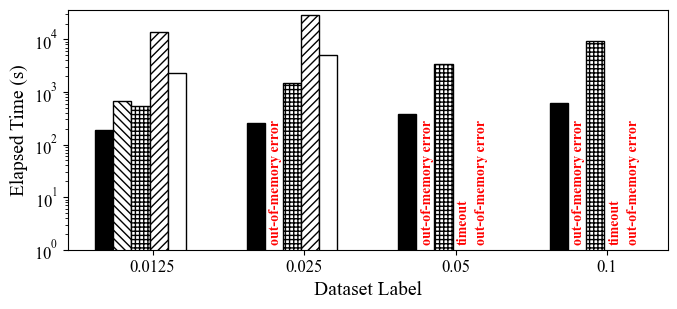

<Figure size 600x60 with 0 Axes>

In [66]:
theme = [
    ['black', ''],
    ['white', '\\\\\\\\'],
    ['white', '++++'],
    ['white', '////'],
    ['white', ''],
]
label = ['TilePACK', 'SystemDS', 'MLlib', 'MADlib', 'SciDB',]


slr_data = [
    [187, 255, 373, 620],          # TilePACK
    [679, 0, 0, 0],                # SystemDS
    [534, 1471, 3451, 9245],       # MLlib
    [14073, 28508, -1, -1],        # MADlib
    [2331, 5072, 0, 0],            # SciDB
]

pr_data = np.array([
    [92, 110, 5139, 90477],             # TilePACK
    [159, 180, 7174, -1],                # SystemDS
    [4041, 3944, 39597, 2769204],       # MLlib
    [3369, 4890, 437503, 13876504],     # MADlib
    [1025, 1172, 51547, 1706184],       # SciDB
]) 

fig = plt.figure(figsize=(6, 2.4))
ax1 = fig.add_axes([0, 0, 1, 1])
# ax2 = fig.add_axes([1.2, 0, 1, 1])

res = a(ax1, theme, label, slr_data, "Sparse LR", _type=2, xticks=["0.0125", "0.025", "0.05", "0.1"])
# res = a(ax1, theme, label, pr_data, "PageRank", _type=2, ylabel_type='ms', hint='pr', xticks=['Enron', 'Epinions', 'Livejournal', 'Twitter'])
plt.savefig('eval_sparse_overall_a.pdf', format='pdf', bbox_inches='tight')

lfig = plt.figure(figsize=(6, 0.6))
plt.figlegend(*ax1.get_legend_handles_labels(), loc = 'upper center', ncol=5, mode="expand", fontsize=11)
lfig.savefig('eval_sparse_overall_legend.pdf', format='pdf', bbox_inches='tight')